## Final test of model

After some struggles, I have managed to get the correct dataset for the test students - as seeds have been set, this is reproducible.

1. Run data_03_preparation code with prediction_point set to correct day.  This will remove rows where student has already withdrawn and assessments and VLE engagements which have not yet taken place.
2. Run 04_1_model_prep code on the above results to get the correct transformed dataset (test only).  
3. Run the code below to do the final data prep and model testing.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# datasets
X_test_transformed_50 = pd.read_csv('../../data/X_test_transformed_50.csv')
X_test_transformed_100 = pd.read_csv('../../data/X_test_transformed_100.csv')
X_test_transformed_150 = pd.read_csv('../../data/X_test_transformed_150.csv')



y_test_binary_50 = pd.read_csv('../../data/y_test_50.csv')
y_test_binary_100 = pd.read_csv('../../data/y_test_100.csv')
y_test_binary_150 = pd.read_csv('../../data/y_test_150.csv')
y_test_binary_50.replace({'Pass': 'no_intervene', 'Distinction': 'no_intervene','Withdrawn': 'intervene', 'Fail': 'intervene'}, inplace=True)
y_test_binary_100.replace({'Pass': 'no_intervene', 'Distinction': 'no_intervene','Withdrawn': 'intervene', 'Fail': 'intervene'}, inplace=True)
y_test_binary_150.replace({'Pass': 'no_intervene', 'Distinction': 'no_intervene','Withdrawn': 'intervene', 'Fail': 'intervene'}, inplace=True)


In [51]:
print((X_test_transformed_50.shape))
print((X_test_transformed_100.shape))
print((X_test_transformed_150.shape))
print((y_test_binary_50.shape))
print((y_test_binary_100.shape))
print((y_test_binary_150.shape))



(5151, 12)
(4866, 12)
(4625, 12)
(5151, 1)
(4866, 1)
(4625, 1)


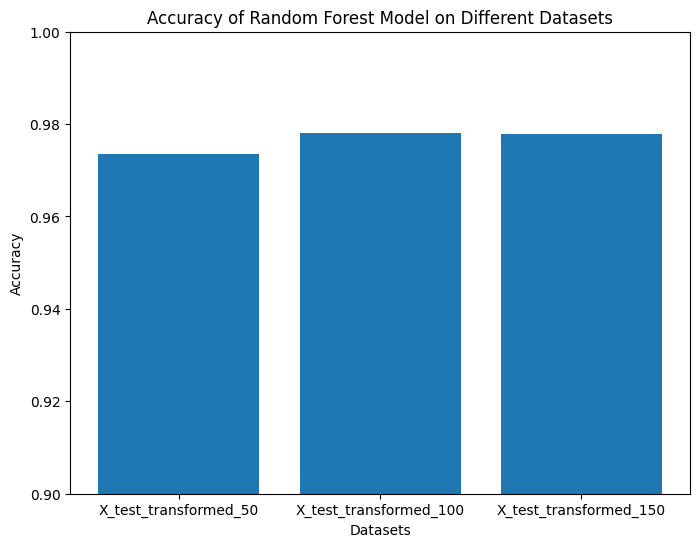

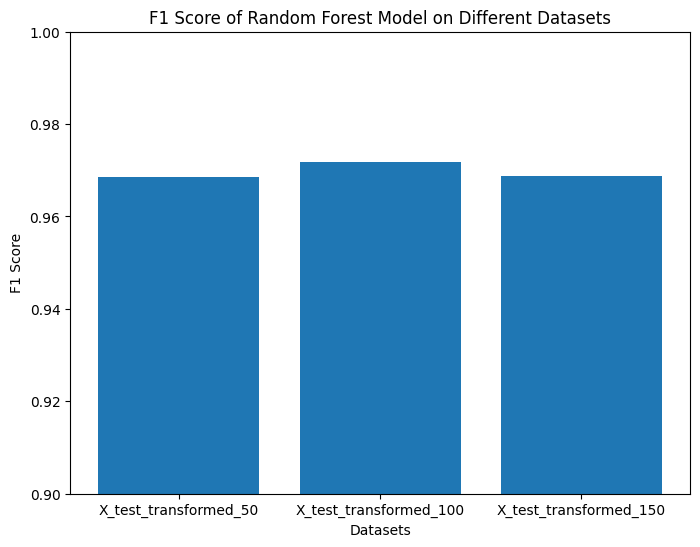

In [52]:
# initialize the best model
rf_model = RandomForestClassifier(min_samples_split=5, n_estimators=200)

# fit the model on each dataset and compute performance metrics
datasets = [X_test_transformed_50, X_test_transformed_100, X_test_transformed_150]
y_datasets = [y_test_binary_50, y_test_binary_100, y_test_binary_150]
labels = ['X_test_transformed_50', 'X_test_transformed_100', 'X_test_transformed_150']
accuracies = []
f1_scores = []

for i, dataset in enumerate(datasets):
    rf_model.fit(dataset, y_datasets[i]['final_result'].values.ravel())
    y_pred = rf_model.predict(dataset)
    accuracy = accuracy_score(y_datasets[i]['final_result'], y_pred)
    f1 = f1_score(y_datasets[i]['final_result'], y_pred, pos_label='intervene')
    accuracies.append(accuracy)
    f1_scores.append(f1)

# results
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies)
plt.title('Accuracy of Random Forest Model on Different Datasets')
plt.xlabel('Datasets')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(labels, f1_scores)
plt.title('F1 Score of Random Forest Model on Different Datasets')
plt.xlabel('Datasets')
plt.ylabel('F1 Score')
plt.ylim(0.9, 1.0)
plt.show()






In [54]:
print(accuracies)
print(f1_scores)

[0.9734032226752087, 0.9780106863953967, 0.9777297297297297]
[0.9685274523317251, 0.9717901397310835, 0.9687973341411694]


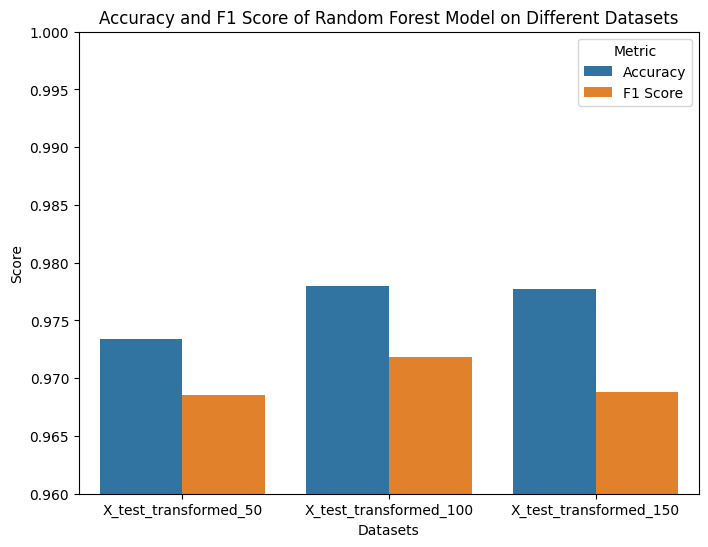

In [60]:
import seaborn as sns

# Create a DataFrame for the data
data = pd.DataFrame({'Datasets': labels, 'Accuracy': accuracies, 'F1 Score': f1_scores})

# Melt the DataFrame to convert columns into rows
melted_data = data.melt('Datasets', var_name='Metric', value_name='Score')

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the bar plot using seaborn
sns.barplot(x='Datasets', y='Score', hue='Metric', data=melted_data)

# Set the title and labels
plt.title('Accuracy and F1 Score of Random Forest Model on Different Datasets')
plt.xlabel('Datasets')
plt.ylabel('Score')
plt.ylim(0.96, 1.0)

# Show the plot
plt.show()







### CODE BELOW is not suitable for use without testing/confirmation/alteration

In [35]:
import pandas as pd

def filter_and_split_datasets(X_dataset_path, y_dataset_path, filter_value):
    # datasets
    X_test_transformed = pd.read_csv(X_dataset_path)
    y_test = pd.read_csv(y_dataset_path)
    
    # datasets based on 'date_unregistration'
    filtered_indices = X_test_transformed[X_test_transformed['date_unregistration'] > filter_value].index
    filtered_X = X_test_transformed.loc[filtered_indices]
    filtered_y = y_test.loc[filtered_indices]
    
    # reindex 
    filtered_X.reset_index(drop=True, inplace=True)
    filtered_y.reset_index(drop=True, inplace=True)
    
    return filtered_X, filtered_y




In [46]:
X_dataset_path = '../../data/X_test_transformed.csv'
y_dataset_path = '../../data/y_test.csv'
prediction_point = 150

filtered_X, filtered_y = filter_and_split_datasets(X_dataset_path, y_dataset_path, prediction_point)




In [47]:
filtered_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4614 entries, 0 to 4613
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   subject_SocSci           4614 non-null   int64  
 1   subject_Stem             4614 non-null   int64  
 2   num_of_prev_attempts     4614 non-null   float64
 3   studied_credits          4614 non-null   float64
 4   prop_submissions         4614 non-null   float64
 5   avg_score                4614 non-null   float64
 6   submission_distance      4614 non-null   float64
 7   stu_activity_count       4614 non-null   float64
 8   stu_activity_type_count  4614 non-null   float64
 9   stu_total_clicks         4614 non-null   float64
 10  stu_days_active          4614 non-null   float64
 11  date_unregistration      4614 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 432.7 KB


In [48]:
# remove 'date_unregistration' column
filtered_X = filtered_X.drop('date_unregistration', axis=1)

filtered_X.to_csv('../../data/X_test_transformed_150.csv', index=False)
filtered_y.to_csv('../../data/y_test_binary_150.csv', index=False)

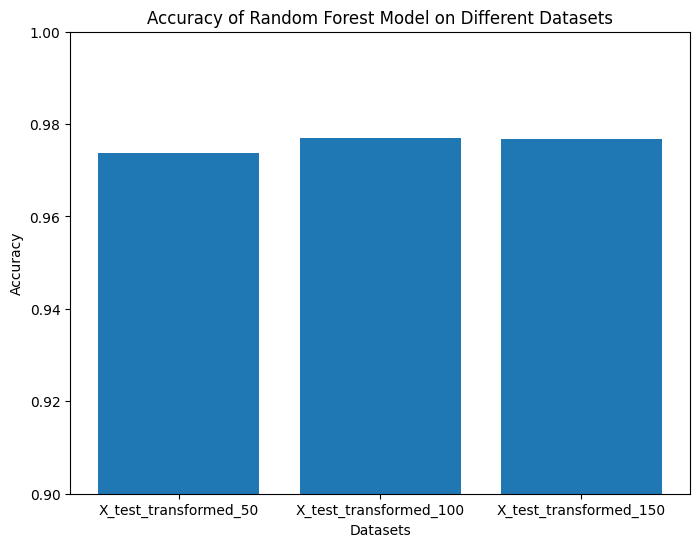

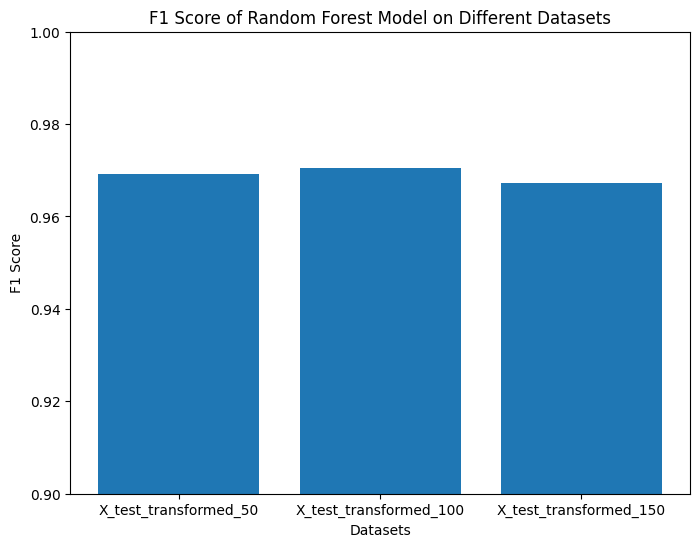

In [49]:
# initialize the best model
rf_model = RandomForestClassifier(min_samples_split=5, n_estimators=200)

# fit the model, performance metrics
datasets = [X_test_transformed_50, X_test_transformed_100, X_test_transformed_150]
y_datasets = [y_test_binary_50, y_test_binary_100, y_test_binary_150]
labels = ['X_test_transformed_50', 'X_test_transformed_100', 'X_test_transformed_150']
accuracies = []
f1_scores = []

for i, dataset in enumerate(datasets):
    rf_model.fit(dataset, y_datasets[i]['final_result'].values.ravel())
    y_pred = rf_model.predict(dataset)
    accuracy = accuracy_score(y_datasets[i]['final_result'], y_pred)
    f1 = f1_score(y_datasets[i]['final_result'], y_pred, pos_label='intervene')
    accuracies.append(accuracy)
    f1_scores.append(f1)

# plot
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies)
plt.title('Accuracy of Random Forest Model on Different Datasets')
plt.xlabel('Datasets')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(labels, f1_scores)
plt.title('F1 Score of Random Forest Model on Different Datasets')
plt.xlabel('Datasets')
plt.ylabel('F1 Score')
plt.ylim(0.9, 1.0)
plt.show()






Again, I there's a problem...I know what it is.

The problem isn't that the students have not been seen - the problem is that their assessments and vles from the future are still in the dataset.  The only difference is that students who have already withdrawn are removed, so the dataseet is smaller (row wise) with fewer withdrawals - so accuracy will be higher. 

Got it!  Run data_03_prep code first, then model_prep and then this code!